# Série 5 - Interpolation en une dimension

Le but de cette série est de vous entrainer à vous servir des techniques d'interpolation en une dimension. On utilisera essentiellement la fonction `interp1d` du module `scipy.interpolate`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Courbe de tarage 

Pour mesurer efficacement le débit de source, on mesure en général le niveau d'eau en amont d'un seuil hydraulique. En effet la mesure du débit est en général longue et fastidieuse quelle que soit la méthode employée (micromoulinet, traçage, etc.). Pour traduire le niveau d'eau en un débit, on mesure simultanément le débit et le niveau d'eau dans différentes situations hydrologiques. Les données sont des valeurs ponctuelles. Le but de l'exercice est de trouver une fonction qui permet d'estimer le débit pour toute valeur du niveau d'eau.

Le jeu de donnée suivant donne les valeurs de niveaux d'eau mesurées en [m] dans le tableau `xd`  et les données de débit en [$m^3/s$] correspondantes dans le tableau `yd`. Le graphe représente les données.

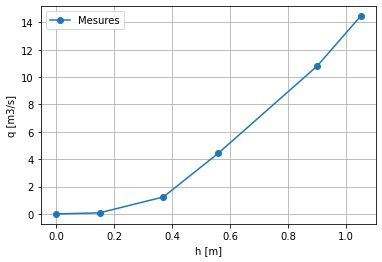

In [2]:
xd = np.array( [0, 0.150, 0.37, 0.56, 0.9, 1.05] ) 
yd = np.array( [0, 0.08,  1.24, 4.45, 10.8, 14.45] )

plt.plot(xd, yd,'o-', label='Mesures')
plt.xlabel('h [m]')
plt.ylabel('q [m3/s]')
plt.grid('on')
plt.legend()
plt.show()

**Exercice 1 - Interpolation linéaire pour un x unique**

On vous demande de donner l'estimation du débit pour un niveau de 0.2 m en utilisant une interpolation linéaire. Stocker la valeur dans la variable `Qlin` et afficher la.

In [3]:
# Programmation à la main de la formule d'interpolation linéaire

xi = 0.2
i = np.where( (xd >= xi) )[0][0] - 1
yi = (yd[i] - yd[i+1]) / (xd[i] - xd[i+1]) * (xi - xd[i+1]) + yd[i+1]

Qlin = yi
print("Le débit pour un niveau de", xi, "m est de", Qlin,"m3/s")

Le débit pour un niveau de 0.2 m est de 0.34363636363636374 m3/s


In [4]:
# Utilisation de interp1d / le résultat est le même

from scipy.interpolate import interp1d
f = interp1d(xd, yd, kind='linear')
Qlin = f( xi )
print("Le débit pour un niveau de", xi, "m est de", Qlin,"m3/s")

Le débit pour un niveau de 0.2 m est de 0.34363636363636374 m3/s


**Exercice 2 - Interpolation pour un tableau de valeurs de x**

On utilise l'interpolation fréquemment, et souvent sans même sans rendre compte, pour tracer des graphes. Dans ce cas, on donne en entrée de la fonction d'interpolation non pas une seule valeur de $x$ mais un tableau de valeurs de $x$.

Dans cette question, on vous demande de créer un vecteur de 100 valeurs `xinterp` de niveau d'eau allant de 0 à 1.05 m (vous pouvez utiliser `np.linspace`). 

Puis utilisez la fonction d'interpolation linéaire pour calculer toutes les valeurs de débits correspondantes. Faites le graphe avec les mesures et les valeurs interpolées. 

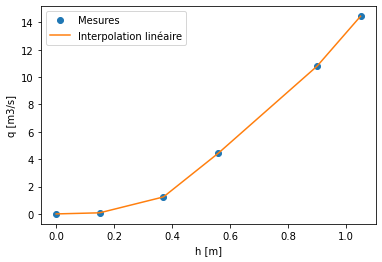

In [5]:
xinterp = np.linspace(0, 1.05, 100)
yinterp = f( xinterp )

plt.plot(xd, yd, 'o', label='Mesures')
plt.plot(xinterp, yinterp, label='Interpolation linéaire')
plt.xlabel('h [m]')
plt.ylabel('q [m3/s]')
plt.legend()
plt.show()

**Exercice 3 - Interpolation Spline cubique**

Refaite le calcul du débit correspondant à une hauteur d'eau de 0.2 m et comparer le résultat avec celui obtenu avec une interpolation linéaire. Commentez.

Puis, refaite la figure avec cette fois-ci une interpolation de type spline cubique.

In [6]:
f = interp1d(xd, yd, kind='cubic')
Qspl = f( xi )
ecart = np.round( 2 * np.abs((Qspl-Qlin)) / (Qspl+Qlin) * 100, 1)
print("Le débit estimé pour un niveau de", xi, "m est de : \n")
print(" -", Qlin, "m3/s avec une interpolation linéaire")
print(" -", Qspl, "m3/s avec une spline cubique \n")
print("L'écart est de", ecart,"pour cent")

Le débit estimé pour un niveau de 0.2 m est de : 

 - 0.34363636363636374 m3/s avec une interpolation linéaire
 - 0.1513616945851884 m3/s avec une spline cubique 

L'écart est de 77.7 pour cent


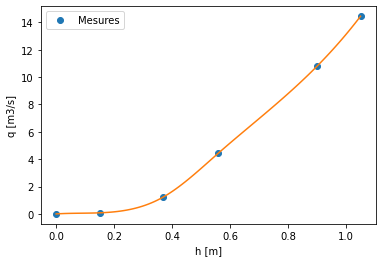

In [7]:
yinterp = f( xinterp )

plt.plot(xd, yd,'o', label='Mesures')
plt.plot(xinterp, yinterp)
plt.xlabel('h [m]')
plt.ylabel('q [m3/s]')
plt.legend()
plt.show()

**Observations :** On constate que pour cette valeur de la hauteur d'eau la différence relative de débit est importante. La vraie valeur n'est pas connue. Les deux valeurs sont raisonnables. Il semble plausible que la courbe soit lisse et donc la valeur interpolée par la Spline cubique semple plus réaliste. Mais ce n'est pas forcément toujours le cas. 

De plus on note que l'écart serait certainement très différent sur d'autres portions de la courbe. Par exemple entre 0.5 et 0.9 la variation  du débit semble plus linéaire.

**Exercice 4 - application à une chronique de données**

Le fichier `niveau_source.txt` contient deux colonnes. La première est une date en nombre de jours depuis le début des mesures. La deuxième colonne contient le niveau d'eau en [m] mesuré chaque jour à la source.

On vous demande de charger ces données, et de transformer tous les niveaux d'eau en débit puis de faire le graphe des débits en fonction du temps.

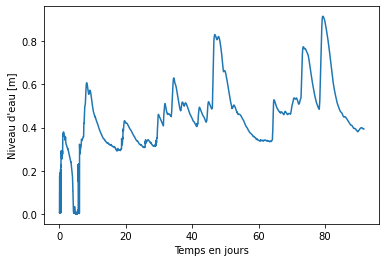

In [8]:
data = np.loadtxt('data/niveau_source.txt')
t = data[:,0]
h = data[:,1]
plt.plot(t,h)
plt.xlabel('Temps en jours')
plt.ylabel("Niveau d'eau [m]")
plt.show()

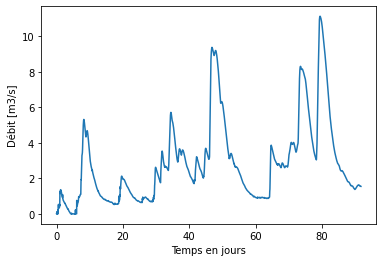

In [9]:
q = f( h )
plt.plot(t, q)
plt.xlabel('Temps en jours')
plt.ylabel("Débit [m3/s]")
plt.show()

# Propriétés de l'eau

On a réalisé une série d'expérience et mesuré avec précision la densité de l'eau [$kg/m^3$] et sa viscosité cinématique [$kg/m \cdot s$] en fonction de la température de l'eau [deg Celsius]. Les données sont fournies dans le fichier `water.txt`. Chaque ligne correspond à une mesure, les colonnes sont dans l'ordre: température, densité, et viscosité. Pour des raisons pratiques, la mesure a été faite seulement pour un nombre limité de valeurs de température.

**Exercice 5 - estimation des propriétés de l'eau**

- Charger le fichier de données
- Faire un ou des graphes pour représenter les données
- Quelle est la densité de l'eau à 45 degrés Celsius ?
- Quelle est la viscosité de l'eau quand sa densité est de 980 kg/m3 ?


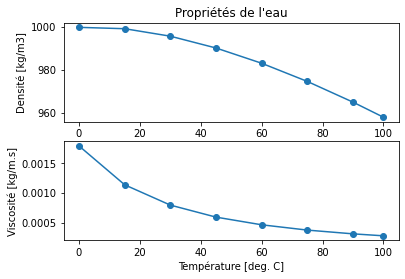

In [11]:
w = np.loadtxt('data/water.txt', skiprows=2)
temp = w[:,0]
rho = w[:,1]
mu = w[:,2]

plt.subplot(2,1,1)
plt.plot(temp, rho, 'o-')
plt.ylabel('Densité [kg/m3]')
plt.title("Propriétés de l'eau")

plt.subplot(2,1,2)
plt.plot(temp, mu, 'o-')
plt.ylabel('Viscosité [kg/m.s]')
plt.xlabel('Température [deg. C]')
plt.show()

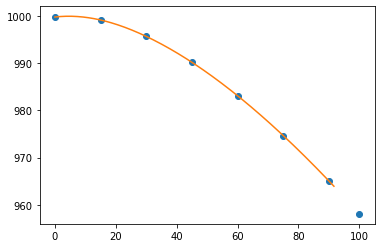

In [12]:
ti = np.linspace(t[0],t[-1],200)
f = interp1d(temp, rho, kind='cubic')
plt.plot(temp, rho, 'o', ti, f(ti))
plt.show()

In [13]:
f = interp1d(temp, rho, kind='cubic')
print( "La densité de l'eau à 45 degrés est de", np.round( f(45),2) , "kg/m3" )

La densité de l'eau à 45 degrés est de 990.22 kg/m3


In [14]:
f = interp1d(rho, mu, kind='cubic')

print("Pour une densité de 980 kg/m3")
print("la viscosité est de", f(980), "kg/m.s" )

Pour une densité de 980 kg/m3
la viscosité est de 0.000455238019854065 kg/m.s


# Mise en concordance des pas de temps

Souvent on prend des mesures avec des instruments différents, à des pas de temps différents. Mais on a besoin de valeurs sur les même pas de temps pour faire des calculs.

**Exercice 6 - Essai de pompage**

Nous disposons de deux jeux de données. Le premier, dans le fichier `pression.txt` donne la pression mesurée dans un piézomètre chaque seconde pendant un essai de pompage. La pression dans le puits diminue à cause du pompage.

Le deuxième fichier, `patm.txt`, donne la pression atmosphérique mesurée beaucoup moins fréquemment car elle varie plus lentement.

Les deux fichier contiennent dans la première colonne le temps en seconde, et dans la deuxième colonne la pression en milibars. 

On vous demande de traiter ces données pour calculer la charge hydraulique $h$ et produire une figure montrant comment varie la charge en fonction du temps pendant le pompage.

Pour calculer la charge hydraulique, vous devez faire le calcul suivant :
$$h = \frac{P-P_a}{\rho g} + z$$
avec $P$ la pression mesurée dans le piézomètre et $P_a$ la pression atmosphérique (les deux en pascal), $\rho$ est la densité de l'eau et vaut $10^3$ et $g=9.81 m/s^2$ l'accélération de la pesanteur, et $z=450 m$ l'altitude du point de mesure.

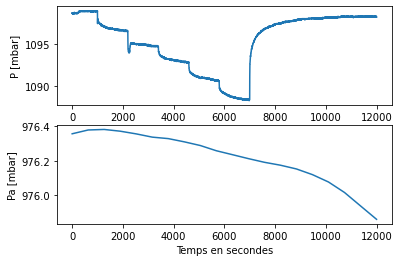

In [15]:
# Chargement des données et affichage pour vérification

data_piezo = np.loadtxt('data/pression.txt')
tp = data_piezo[:,0]
p = data_piezo[:,1]

data_atm = np.loadtxt('data/patm.txt')
tatm = data_atm[:,0]
patm = data_atm[:,1]

plt.subplot(2,1,1)
plt.plot(tp, p)
plt.ylabel('P [mbar]')
plt.subplot(2,1,2)
plt.plot(tatm, patm)
plt.xlabel('Temps en secondes')
plt.ylabel('Pa [mbar]')
plt.show()

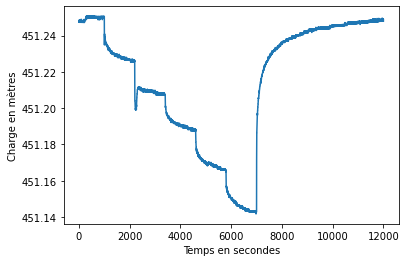

In [16]:
# Interpolationde la pression atmosphérique sur 
# les pas de temps de mesure de la pression
f = interp1d(tatm, patm, kind='cubic')
patm_interp = f(tp)

# Calcul de la charge
rho = 1000
g = 9.81
h = (p - patm_interp) / rho / g * 100 + 450

plt.plot(tp,h)
plt.xlabel('Temps en secondes')
plt.ylabel('Charge en mètres')
plt.show()